In [18]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Activation
from keras import applications
from keras import optimizers
import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras import backend as K

from skimage import color, transform, exposure
from skimage.io import imread
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import data, img_as_float
from skimage import exposure
from skimage.morphology import square

In [6]:
# dimensions of our images.
img_width, img_height = 256, 256

train_data_dir = '../data/model/key19/train'
validation_data_dir = '../data/model/key19/validation'
test_data_dir = '../data/model/key19/test'
nb_train_samples = int(len(glob.glob(train_data_dir+'/*/*')))
nb_validation_samples = int(len(glob.glob(validation_data_dir+'/*/*')))
nb_test_samples = int(len(glob.glob(test_data_dir+'/*/*')))
epochs = 50
batch_size = 16
print('Found {} training samples, {} validation samples and {} test samples'.format(nb_train_samples,nb_validation_samples, nb_test_samples))

Found 445 training samples, 192 validation samples and 153 test samples


In [7]:
datagen = ImageDataGenerator()

In [8]:
image_paths = glob.glob(test_data_dir+'/pos4/*')

In [65]:
image = image_paths[1]
img = load_img(image,target_size=(256,256))  # load image
x = img_to_array(img)/255.  # convert to numpy shape (3, 150, 150)

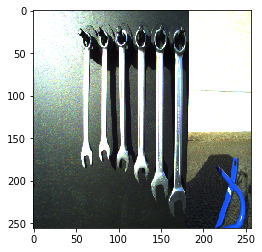

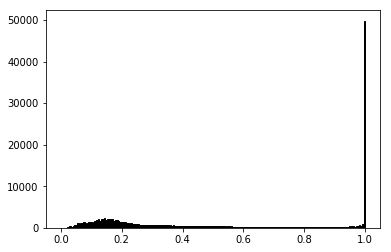

In [66]:
plt.imshow(x)
plt.show()
plt.hist(x.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [67]:
#hsv colorspace
hsv = color.rgb2hsv(x)

# value channel (v)
hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
img = color.hsv2rgb(hsv)

# central square crop
min_side = min(img.shape[:-1])
centre = img.shape[0] // 2, img.shape[1] // 2
img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
      centre[1] - min_side // 2:centre[1] + min_side // 2,
      :]

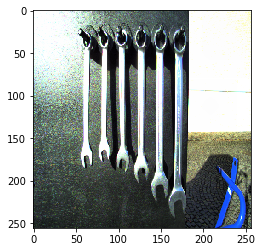

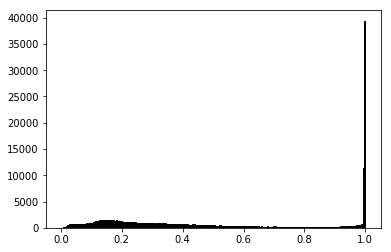

In [68]:
plt.imshow(img)
plt.show()
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [69]:
# Contrast stretching
p2, p98 = np.percentile(x, (2, 98))
img_rescale = exposure.rescale_intensity(x, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(x)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(x, clip_limit=0.3)

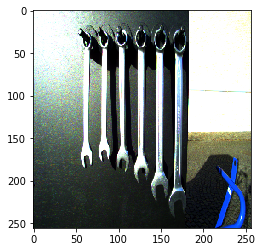

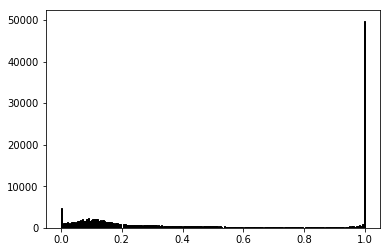

In [70]:
plt.imshow(img_rescale)
plt.show()
plt.hist(img_rescale.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()



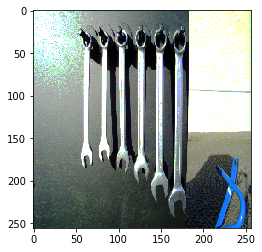

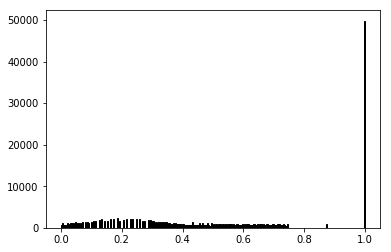

In [71]:
plt.imshow(img_eq)
plt.show()
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()


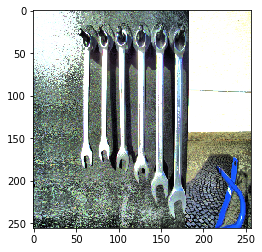

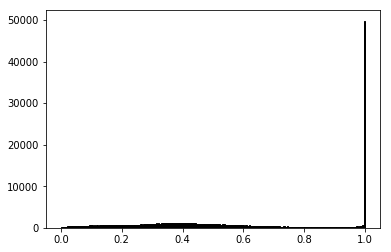

In [72]:
plt.imshow(img_adapteq)
plt.show()
plt.hist(img_adapteq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()